In [1]:
import numpy as np
import urllib.request, json 
import pandas as pd
import matplotlib.pyplot as plt

#1.  sma algorithme
def sma_algo(data,window):
    weights=np.repeat(1.0,window)
    sma=np.convolve(data,weights/window,'valid')
    return(sma)

In [11]:
#2 Import data
with urllib.request.urlopen("https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=MSFT&apikey=demo)") as url:
    data = json.loads(url.read().decode())
    print(data)

{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes', '2. Symbol': 'MSFT', '3. Last Refreshed': '2018-12-03 16:00:02', '4. Output Size': 'Compact', '5. Time Zone': 'US/Eastern'}, 'Time Series (Daily)': {'2018-12-03': {'1. open': '113.0000', '2. high': '113.4200', '3. low': '110.7300', '4. close': '112.0900', '5. volume': '34264092'}, '2018-11-30': {'1. open': '110.7000', '2. high': '110.9700', '3. low': '109.3600', '4. close': '110.8900', '5. volume': '33665624'}, '2018-11-29': {'1. open': '110.3300', '2. high': '111.1150', '3. low': '109.0300', '4. close': '110.1900', '5. volume': '28123195'}, '2018-11-28': {'1. open': '107.8900', '2. high': '111.3300', '3. low': '107.8600', '4. close': '111.1200', '5. volume': '46788461'}, '2018-11-27': {'1. open': '106.2700', '2. high': '107.3300', '3. low': '105.3600', '4. close': '107.1400', '5. volume': '29124486'}, '2018-11-26': {'1. open': '104.7900', '2. high': '106.6300', '3. low': '104.5800', '4. close': '106.

In [12]:
#3 Calculate Average Price

def average_price(date):

    high=data['Time Series (Daily)'][date]['2. high']
    low=data['Time Series (Daily)'][date]['3. low']
    average_price=(float(high)+float(low))/2
    print(average_price)

In [13]:
#4 Calculate SMA values of 5 day  based on daily average prices
 
data=data['Time Series (Daily)']
df = pd.DataFrame(data).T

#rename columns
df = df.rename(columns={'2. high':'Hight','3. low':'Low'})

#change data type
df['Hight']=df['Hight'].astype(float)
df['Low']=df['Low'].astype(float)
df['Averge Price']=(df['Hight'] + df['Low'])/2

#Calculate SMA values
sma=sma_algo(df['Averge Price'],5)
sma = pd.DataFrame(sma)
print(sma)


            0
0   109.65050
1   108.35650
2   106.90449
3   105.55699
4   103.87027
5   103.81227
6   104.25927
7   104.84928
8   105.45528
9   106.76100
10  107.15600
11  107.60900
12  108.75000
13  109.64100
14  109.61500
15  109.37300
16  108.58150
17  107.55450
18  106.74350
19  105.68050
20  105.34950
21  105.47100
22  105.72800
23  105.38301
24  106.34201
25  107.18701
26  107.74301
27  108.03701
28  109.16482
29  109.79282
..        ...
66  109.19100
67  108.27300
68  107.56400
69  107.18700
70  107.03400
71  107.14500
72  107.41350
73  107.87250
74  108.20250
75  108.55050
76  108.91050
77  109.18099
78  109.12899
79  108.95889
80  108.63889
81  107.95589
82  107.29150
83  106.77450
84  106.40560
85  106.55060
86  107.30760
87  107.99600
88  108.39400
89  108.59200
90  108.38800
91  107.25800
92  106.45950
93  105.93350
94  105.54000
95  105.08100

[96 rows x 1 columns]


In [14]:

#5 Calculate the profit

#Extract date
date=pd.DataFrame(df.index)
date=date.drop(axis=1,index=[0,1,2,3])
date.index = np.arange(len(date.index))


In [16]:
#create new dataframe with sma values and the date
df1= pd.concat([date,sma], axis=1,ignore_index=True).transpose()
df1= df1.T.set_index(0)[1].rename('sma').astype(float)



In [18]:
#add the new dataframe to the previous one
df['SMA']=df1
df


,1. open,Hight,Low,4. close,5. volume,Averge Price,SMA
2018-12-03,113.0000,113.4200,110.7300,112.0900,34264092,112.07500,NaN
2018-11-30,110.7000,110.9700,109.3600,110.8900,33665624,110.16500,NaN
2018-11-29,110.3300,111.1150,109.0300,110.1900,28123195,110.07250,NaN
2018-11-28,107.8900,111.3300,107.8600,111.1200,46788461,109.59500,NaN
2018-11-27,106.2700,107.3300,105.3600,107.1400,29124486,106.34500,109.65050
2018-11-26,104.7900,106.6300,104.5800,106.4700,32336165,105.60500,108.35650
2018-11-23,102.1700,103.8099,102.0000,103.0700,13823099,102.90495,106.90449
2018-11-21,103.6000,104.4300,102.2400,103.1100,28130621,103.33500,105.55699
2018-11-20,101.8000,102.9700,99.3528,101.7100,64052457,101.16140,103.87027
2018-11-19,108.2700,108.5600,103.5500,104.6200,44773899,106.05500,103.81227


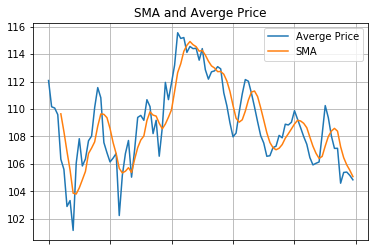

In [20]:
#visualize data
df[['Averge Price','SMA']].plot(grid=True)
plt.title('SMA and Averge Price')
plt.show()

In [22]:
#Calculate the profit
buy_actions= df.loc[df['SMA'] < df['Averge Price'],'Averge Price'].sum()
sell_action= df.loc[df['SMA'] > df['Averge Price'],'SMA'].sum()
profit=sell_action-buy_actions
print("User's profit :",profit)

User's profit : 631.8440100000007
